# Apertura de las bases de datos.

## Importación de librerías.

In [12]:
# Se descargan las librerías necesarias.

# ! pip install openpyxl
# ! pip install scipy}
# ! pip install seaborn

In [2]:
# Se importan las librerías a utilizar.
import pandas as pd
import numpy as np
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Se extraen la rutas de los archivos
ruta_homicidios = "../Data/Originales/homicidios.xlsx"
ruta_lesiones = "../Data/Originales/lesiones.xlsx"

# Revisión de las bases de datos

## Homicidios - hechos

### Revisión de la base de datos.

In [78]:
# Se convierte la base de datos en un dataframe de pandas y se observa la composición de las primeras líneas de la base de datos.
hechos = pd.read_excel(ruta_homicidios, sheet_name= "HECHOS")
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [79]:
# Se observa la composición de las variables de la base de datos y el tipo de dato. 
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [80]:
# Como algunas de las columnas no retornan el tipo de dato que se esperaría, se decide revisar que el formato esté correctamente formateado. 
print(f"El tipo de dato de la columna 'hora' es: {type(hechos.loc[1,"HORA"])}")
print(f"El tipo de dato de la columna 'pox x' es: {type(hechos.loc[1,"pos x"])}")
print(f"El tipo de dato de la columna 'pos y' es: {type(hechos.loc[1,"pos y"])}")

El tipo de dato de la columna 'hora' es: <class 'datetime.time'>
El tipo de dato de la columna 'pox x' es: <class 'str'>
El tipo de dato de la columna 'pos y' es: <class 'str'>


In [81]:
# Es de notar que tanto en "Pos X" como en "Pos Y" hay datos que no presentan información, sino únicamente un "." (punto) sin información.
hechos[hechos["pos x"] == "."]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [82]:
# Como las columnas "pos x" y "pos y" aparecen como tipo string, se convierten a tipo float, corrigiendo los valores nulos.
hechos["pos x"] = pd.to_numeric(hechos["pos x"], errors='coerce')
hechos["pos y"] = pd.to_numeric(hechos["pos y"], errors='coerce')

In [83]:
# Se observa el resultado 
hechos[hechos["pos x"].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),NaN,NaN,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),NaN,NaN,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [84]:
# Se observa la distribución de la base de datos.
hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA,pos x,pos y
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000,-58.356082,-34.534654
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050,0.046144,0.035289


De este primer vistado de los resultados de las columnas, salta a la vista que en la columna "COMUNA" se presentan datos en 0, los cuales al ser observados (véase la celda de código de abajo), son dos datos cuya información no aparece completa. Se deciden eliminar estos dos registros ya que al no tener tampoco información en las columnas "Pos x" y "pos y" no podría ser usado posteriormente para análisis.

In [85]:
hechos[hechos["COMUNA"] == 0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD


In [86]:
hechos = hechos[hechos["COMUNA"] != 0]

In [87]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     694 non-null    object        
 1   N_VICTIMAS             694 non-null    int64         
 2   FECHA                  694 non-null    datetime64[ns]
 3   AAAA                   694 non-null    int64         
 4   MM                     694 non-null    int64         
 5   DD                     694 non-null    int64         
 6   HORA                   694 non-null    object        
 7   HH                     694 non-null    object        
 8   LUGAR_DEL_HECHO        694 non-null    object        
 9   TIPO_DE_CALLE          694 non-null    object        
 10  Calle                  694 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Dirección 

In [4]:
# Se decide guardar la base de datos trabajada.
hechos.to_csv("../Data/Corregidos/hechos.csv",index=False)

NameError: name 'hechos' is not defined

In [5]:
# Se revisa que la base cargue adecuadamente.
hechos = pd.read_csv("../Data/Corregidos/hechos.csv")
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


### Revisión estadística

Se decide revisar la existencia de outliers para la base de datos a partir del número de víctimas. 

In [89]:
# Se calcula el Q1 (Primer cuartil) y Q3 (Tercer cuartil).
Q1 = hechos["N_VICTIMAS"].quantile(0.25)
Q3 = hechos["N_VICTIMAS"].quantile(0.75)

print(f"El primer cuartil es {Q1}")
print(f"El tercer cuartil es {Q3}")

# Se hace el cálculo del IQR (Rango Intercuartil).
IQR = Q3 - Q1
print(f"El rango intercuartil es {IQR}")

# Se establecen los límites para encontrar a los outliers.
inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

# Filtrado de outliers
outliers = hechos[
    (hechos["N_VICTIMAS"] < inferior) | (hechos["N_VICTIMAS"] > superior)
]

# Se observan los casos de outliers
print("Los outliers identificados son:")
outliers


El primer cuartil es 1.0
El tercer cuartil es 1.0
El rango intercuartil es 0.0
Los outliers identificados son:


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
29,2016-0041,2,2016-03-29,2016,3,29,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,...,NaN,RIVERA INDARTE AV.,DIRECTORIO AV. y RIVERA INDARTE AV.,7,Point (100232.38564985 99530.25843190),-58.460766,-34.633504,MOTO-CARGAS,MOTO,CARGAS
97,2016-0126,2,2016-09-18,2016,9,18,22:45:00,22,IRIGOYEN Y TINOGASTA,CALLE,...,NaN,TINOGASTA,IRIGOYEN y TINOGASTA,10,Point (94275.54271123 100886.87954649),-58.525721,-34.621259,AUTO-CARGAS,AUTO,CARGAS
159,2017-0026,2,2017-02-26,2017,2,26,05:15:00,5,AV. PERITO MORENO Y FOURNIER,AVENIDA,...,NaN,FOURNIER,"MORENO, PERITO AV. y FOURNIER",4,Point (104113.67806500 97722.68219304),-58.418428,-34.649791,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
168,2017-0035,3,2017-03-23,2017,3,23,05:00:00,5,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.358815,-34.611136,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
169,2017-0036,2,2017-03-29,2017,3,29,18:00:00,18,CURUPAYTI Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,...,NaN,CAMPANA,"PAZ, GRAL. AV. y CAMPANA",12,Point (95300.18060161 105287.23850698),-58.514523,-34.581598,MOTO-PASAJEROS,MOTO,PASAJEROS
178,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
228,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,...,NaN,MACHAIN,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.494911,-34.547956,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
232,2017-0112,2,2017-09-10,2017,9,10,09:32:17,9,AU 25 DE MAYO Y AV. VARELA,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y VARELA AV.,7,Point (100479.14412395 98812.52258620),-58.458074,-34.639974,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
242,2017-0126,2,2017-10-14,2017,10,14,06:15:00,6,AV. RIESTRA Y CAÑADA DE GOMEZ,AVENIDA,...,NaN,CA?ADA DE GOMEZ,RIESTRA AV. y CAÃ‘ADA DE GOMEZ,8,Point (98466.20276785 94207.42419155),-58.480037,-34.681485,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
265,2017-0153,2,2017-12-11,2017,12,11,02:00:00,2,ROSARIO Y AV. LA PLATA,AVENIDA,...,NaN,LA PLATA AV.,ROSARIO y LA PLATA AV.,6,Point (103186.65733155 101217.09689755),-58.428553,-34.618294,MOTO-PASAJEROS,MOTO,PASAJEROS


Para esta ocasión, si bien se encuentran casos de outliers por encima del límite superior, son datos que tienen sentido que ocurran (pueden haber accidentes de más de una (1) persona) y no resultan casos muy extremos en comparación (por ejemplo, más de 10 víctimas). Con esto en mente, se decide observar la composición de los datos para N_Víctimas, año (AAAA), Comuna, Victima, y Acusado.

In [90]:
# Para número de víctimas.
print("Para el número de víctimas:")
print(hechos["N_VICTIMAS"].value_counts(normalize=True))

# Para el año.
print("Para el año:")
print(hechos["AAAA"].value_counts(normalize=True))

Para el número de víctimas:
N_VICTIMAS
1    0.971182
2    0.027378
3    0.001441
Name: proportion, dtype: float64
Para el año:
AAAA
2018    0.206052
2016    0.204611
2017    0.188761
2019    0.148415
2021    0.139769
2020    0.112392
Name: proportion, dtype: float64


In [91]:
# Para la comuna.
print("Para la comuna:")
print(hechos["COMUNA"].value_counts(normalize=True))

Para la comuna:
COMUNA
1     0.129683
4     0.109510
9     0.105187
8     0.093660
7     0.086455
3     0.064841
15    0.063401
13    0.057637
12    0.053314
14    0.050432
11    0.046110
10    0.041787
2     0.036023
5     0.031700
6     0.030259
Name: proportion, dtype: float64


In [92]:
# Para el tipo de víctima. 
print("Para el tipo de víctima:")
print(hechos["VICTIMA"].value_counts(normalize=True))

# Para el tipo de acusado.
print("Para el tipo de acusado:")
print(hechos["ACUSADO"].value_counts(normalize=True))

Para el tipo de víctima:
VICTIMA
MOTO           0.425072
PEATON         0.378963
AUTO           0.119597
BICICLETA      0.041787
SD             0.011527
CARGAS         0.010086
PASAJEROS      0.007205
MOVIL          0.002882
OBJETO FIJO    0.001441
PEATON_MOTO    0.001441
Name: proportion, dtype: float64
Para el tipo de acusado:
ACUSADO
AUTO           0.293948
PASAJEROS      0.249280
CARGAS         0.210375
OBJETO FIJO    0.089337
MOTO           0.082133
SD             0.030259
MULTIPLE       0.024496
BICICLETA      0.010086
OTRO           0.008646
TREN           0.001441
Name: proportion, dtype: float64


A partir de las estadísticas que se obtienen, se pueden observar lo siguiente: 

- Para el **número de víctima por accidente**, la mayor parte de los accidentes tienen una sóla víctima (aproximadamente el 97%). 

- Es importante notar que **la mayoría de los accidentes ocurren en el 2018 y 2016**. Y se presenta una tendencia hacia la baja respecto al año anterior en 2017 y 2019. Puede ser importante revisar cambios en las políticas o leyes de tránsito, o si ocurrieron eventos políticos/sociales que hayan podido disminuido la movilización en la región. Es necesario también tener en cuenta que si bien para el año 2020 y 2021 se presentan los menores índices de hechos, estos también se ven permeados por los efectos de la pandemia por COVID-19, lo que puede estar generando cambios en los datos que no se correspondería a otros periodos de tiempo "normales".

- **Para comuna**, se observa que la comuna 1, 4 y 9 son las 3 comunas que presentan más número de accidentes. Puede ser importante revisar la manera en la que los flujos automovilísticos ocurren actualmente para cada una de estas tres comunas, lo que podría favorecer menos tráfico (y menos accidentes) en caso de que sean zonas altamente pobladas o zonas altamente transitadas. Así mismo, puede ser importante que se revisen las razones por las que tantas personas transitan estas comunas (es decir, ¿las personas viven en estas zonas? ¿Transitan por estas zonas por negocios, por motivos de creación, salud, otros?, ¿o tienen que transitar por estas zonas debido a la facilidad de desplazamiento a través de la ciudad por falta de otras vías de acceso?). A partir de la revisión de estas razones, pueden resultar análisis que permitan mejorar la circulación por la ciudad. 

- Por el **tipo de víctima**, se observan que las mayores víctimas son conductores de moto o peatones por la calle con una elevada diferencia (juntos representan aproximadamente el 80,4% de los hechos registrados) respecto a los demás tipos de víctimas. Puede ser importante tener en cuenta especialmente a estas dos poblaciones al momento de pensar políticas que permitan la reducción de los hechos. 

- Para el **tipo de acusado**, se observa que las tres poblaciones que más generan accidentes son conductores de auto, seguido por los pasajeros de vehículos privados (autos) y finalmente a conductores de vehículos de carga. Donde estas tres poblaciones representan el 75,3% de los hechos registrados. Puede ser importante indagar más sobre el contexto en estas tres poblaciones respecto al factor humano (por ejemplo, nivel de alcoholemia, distracciones por llevar niños en el auto, maniobras imprudentes, falta de sueño o sonambulismo al volante, entre otras) y causas técnicas que pueden ser evitadas (revisión de frenos, carreteras en mal estado, cambio de aceite, presión de los neumáticos, etc.). A partir de estas razones, se pueden generar leyes que puedan prevenir estos casos a partir de obligaciones respecto a la revisión técnica preventiva, y/o de enseñanza de una mejor y más segura cultura al volante.

Veamos a continuación más relaciones:

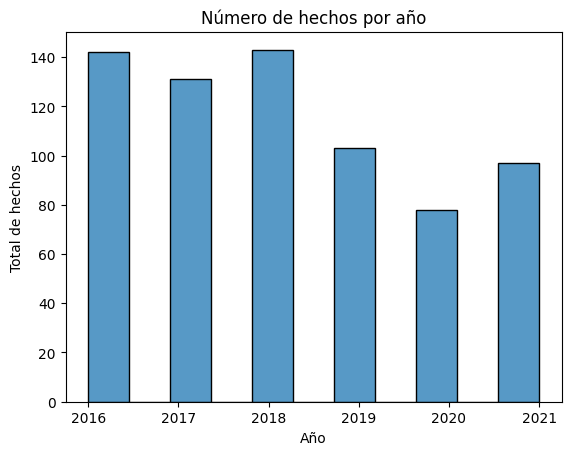

In [17]:
# Relación por número de hechos y año en el que ocurren.

sns.histplot(hechos,x = "AAAA")
plt.xlabel("Año")
plt.ylabel("Total de hechos")
plt.title("Número de hechos por año")
plt.show()

Como se demostró anteriormente, los años donde más ocurrieron hechos fueron en el 2016 y 2019. Siendo 2020 y 2021 los años con menor número de hechos registrados, en donde es importante tener en cuenta que estos dos años se vieron mayormente afectados por las pandemia de COVID-19. El año 2019 puede ser un periodo importante de revisión ya que se presenta una tendencia a la baja respecto a los tres periodos anteriores (2016 - 2018).

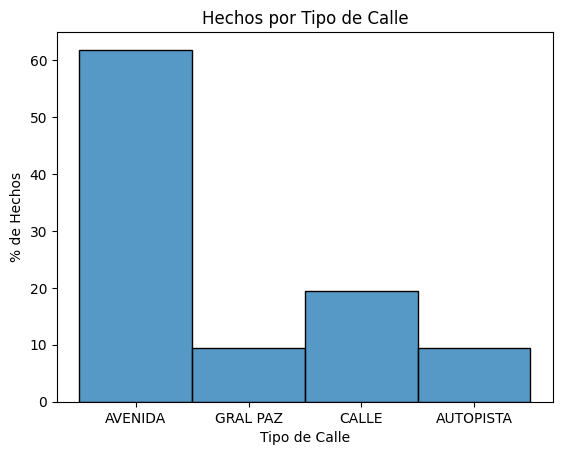

In [42]:
# Por tipo de calle.
sns.histplot(hechos, x = "TIPO_DE_CALLE",stat="percent")
plt.xlabel("Tipo de Calle")
plt.ylabel("% de Hechos")
plt.title("Hechos por Tipo de Calle")
plt.show()

En este gráfico observamos el porcentaje de hechos ocurridos por el tipo de calle. Para la data dada, la mayoría de los hechos ocurren en las avenidas (aproximadamente el 60%), seguida de las calles (aprox. 20%). Podría ser importante revisar en qué segmento de estas ocurren los hechos; es decir, si ocurren al momento en el que se produce un intercambio entre una avenida / calle con otra (cruces), o si ocurren durante el recorrido / tránsito de estas.  

In [46]:
# A partir de la pregunta anterior, se desea revisar el número de hechos que ocurren en cruces. Para ello se revisa el total de hechos registrados por tipo de calle y el total de hechos registrados que ocurren en cruces. 

conteo_cruces = hechos.groupby("TIPO_DE_CALLE")[["ID","Cruce"]].count().reset_index() # Se obtiene el número de hechos por tipo de calle, y el número de hechos que ocurren en cruces.
conteo_cruces["%_Representación"] = round((conteo_cruces["Cruce"]/conteo_cruces["ID"])*100,2) # Se obtiene el porcentaje de representación del Cruce para el total de hechos registrados para el tipo de calle en el que ocurre.

# Se observa la tabla resultado.
conteo_cruces

,TIPO_DE_CALLE,ID,Cruce,%_Representación
0,AUTOPISTA,65,27,41.54
1,AVENIDA,429,352,82.05
2,CALLE,135,90,66.67
3,GRAL PAZ,65,56,86.15


Para los cruces, se puede observar que tanto para avenidas, calles y General Paz, los hechos que ocurren en cruces representan la mayor parte de la muestra para cada una de estos tipos de calles. Esto nos puede dar una indicación de la importancia que puede ser el revisar correcta señalización, así como el tráfico en los cruces en donde ocurren estos accidentes (tomando en cuenta las comunas principales revisadas anteriormente). Si bien, en las autopistas los accidentes que ocurren en cruces son menores (debido al tipo de flujo que existen en este tipo de calle), siguen presentándose un importante número de este tipo de hecho. 

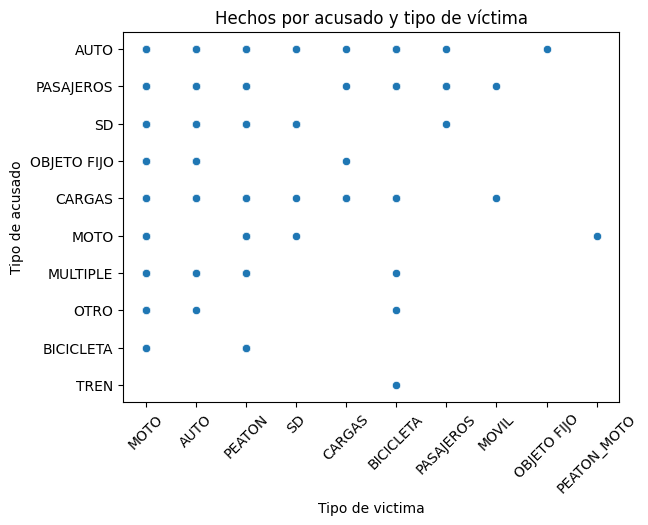

In [51]:
sns.scatterplot(hechos,x="VICTIMA",y="ACUSADO")
plt.tick_params(axis="x",rotation=45)
plt.xlabel("Tipo de victima")
plt.ylabel("Tipo de acusado")
plt.title("Hechos por acusado y tipo de víctima")
plt.show()

La gráfica anterior nos permite observar el acontecimiento de hechos de acuerdo al tipo de acusado y al tipo de víctima. Como era de esperar, de acuerdo a los resultados anteriores respecto al número de hechos por tipo de acusado y tipo de víctima, los acusados por auto, pasajeros y carga presentan diversos tipos de víctimas. Como curiosidad de la muestra, sólo se presentan accidentes donde la víctima fue un móvil por razón de los pasajeros y vehículos de carga.

Como dato interesante de la muestra, sólo se registran víctimas de accidente por tren a bicicletas. 

In [52]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
